In [1]:
# Anscombe's quartet 
# Author: Drishtii
try:
    import seaborn as sns
except:
    %pip install seaborn
    import seaborn as sns
    
try:
    import matplotlib.pyplot as plt
except:
    %pip install matplotlib
    import matplotlib.pyplot as plt

try:
    from sklearn.linear_model import LinearRegression
except:
    %pip install scikit-learn
    from sklearn.linear_model import LinearRegression


In [2]:
import os
dev_mode = "DEV_MODE" in os.environ

if dev_mode:
    import sys
    sys.path.append("../scripts")
    import pyprobml_utils as pml
    from latexify import latexify
    latexify(scale_factor=4, fig_height=1.5)

In [3]:
plt.figure()
sns.set_theme(style="ticks")
df = sns.load_dataset("anscombe")
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


<Figure size 432x288 with 0 Axes>

In [4]:
names = df['dataset'].unique()
names

array(['I', 'II', 'III', 'IV'], dtype=object)

In [5]:
data = df[df["dataset"] == names[0]]

In [ ]:
def make_graph(ax,data):
    x = data["x"]
    y = data["y"]
    dataset_no = data["dataset_no"]
    
    model = LinearRegression().fit(x,y)
    y_pred = model.predict(x)
    
    plt.plot(x,y_pred)
    plt.scatter(x,y,s=2)

/tmp/ipykernel_32004/2893117352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(by="x",inplace=True)


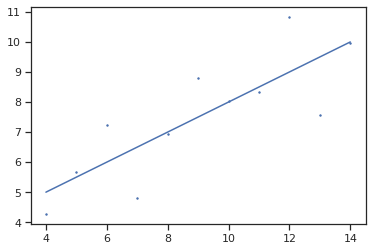

In [6]:
data = df[df["dataset"] == names[0]]
data.sort_values(by="x",inplace=True)
x = data["x"].values.reshape(-1,1)
y = data["y"].values.reshape(-1,1)

ax.set_xlim(0, 20)
ax.set_ylim(0, 14)

In [7]:

# sns_lmplot = sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df, col_wrap=4, ci=None, palette="muted",
#                height=4, scatter_kws={"s": 50, "alpha": 1}, legend_out=True, truncate=False)
# sns_lmplot.set(xlim=(2.5, 20.5 ))

# if dev_mode:
    
#     pml.savefig("anscombes_quartet_latexified.pdf")

# sns.despine()
# names = df['dataset'].unique()
# for name in names:
#     print(name)
#     name_index = df['dataset']==name
#     df2 = df[name_index]
#     lm = sns.lmplot(x="x", y="y", data=df2, ci=None, truncate=False)
#     ax = plt.gca()
#     ax.set_xlim(0, 20)
#     ax.set_ylim(0, 14)
#     mean_x = df2['x'].to_numpy().mean();
#     mean_y = df2['y'].to_numpy().mean()
#     ax.set_title(f'{name}, mean_x={mean_x:0.3f}, mean_y={mean_y:0.3f}', fontsize=12)
#     print(df2[['x', 'y']].agg(['count', 'mean', 'var']))
#     if dev_mode:
#         pml.savefig(f"anscombes_quartet_{name}_latexified.pdf")
        
#     sns.despine();



In [8]:
# Compare the two different estimators for the variance
# https://github.com/probml/pml-book/issues/264
for d in ['I', 'II', 'III', 'IV']:
    print('dataset ', d)

    x = df[df['dataset'] == d]['x'].to_numpy()
    print('var x, MLE = {:.2f}'.format(((x - x.mean()) ** 2).mean()))
    print('var x, numpy: {:.2f}'.format(x.var()))
    print('var x, unbiased estimator: {:.2f}\n'.format(x.var(ddof=1)))

    y = df[df['dataset'] == d]['y'].to_numpy()
    print('var y, MLE = {:.2f}'.format(((y - y.mean())**2).mean()))
    print('var y, numpy: {:.2f}'.format(y.var()))
    print('var y, unbiased estimator: {:.2f}\n'.format(y.var(ddof=1)))

dataset  I
var x, MLE = 10.00
var x, numpy: 10.00
var x, unbiased estimator: 11.00

var y, MLE = 3.75
var y, numpy: 3.75
var y, unbiased estimator: 4.13

dataset  II
var x, MLE = 10.00
var x, numpy: 10.00
var x, unbiased estimator: 11.00

var y, MLE = 3.75
var y, numpy: 3.75
var y, unbiased estimator: 4.13

dataset  III
var x, MLE = 10.00
var x, numpy: 10.00
var x, unbiased estimator: 11.00

var y, MLE = 3.75
var y, numpy: 3.75
var y, unbiased estimator: 4.12

dataset  IV
var x, MLE = 10.00
var x, numpy: 10.00
var x, unbiased estimator: 11.00

var y, MLE = 3.75
var y, numpy: 3.75
var y, unbiased estimator: 4.12



In [9]:
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82
